In [146]:
# read top 10 growth rate and rent summary of each region
import pandas as pd
rent_summary = pd.read_csv('../data/curated/average_rent_year.csv')
top10 = pd.read_csv('../data/curated/top_10.csv')

In [147]:
# get the region name of top 10
top10_region = top10.columns

In [148]:
top10_region = list(top10_region)

In [149]:
top10_region.remove('Unnamed: 0')

In [150]:
top10_region

['Golden Plains - South',
 'Gannawarra',
 'Irymple',
 'Camperdown',
 'Hamilton (Vic.)',
 'Portarlington',
 'Plenty - Yarrambat',
 'St Arnaud',
 'Cranbourne South',
 'year']

In [151]:
# read the full property data 
property_17_22 = pd.read_csv('../data/curated/2017_2022_house_data_final.csv')
property_23_25 = pd.read_csv('../data/curated/2023_2025_house_data_final.csv')

In [152]:
property_23_25 = property_23_25.rename(columns={'year': 'years'})

In [153]:
property_23_25 = property_23_25.drop(['Unnamed: 0'],axis=1)
property_17_22 = property_17_22.drop(['Unnamed: 0'],axis=1)

In [154]:
merge_data = property_17_22.append(property_23_25)

In [155]:
for feature in ['bed','bath','car']:
    merge_data[feature] = merge_data[feature].fillna(0)

In [156]:
top10_region_all_feature = merge_data[merge_data.closest_sa2.isin(top10_region)]

In [157]:
top10_region_all_feature['property_type'] = top10_region_all_feature['property_type'].str.replace(r'Category : ', '')

/Users/tianhao/opt/anaconda3/envs/ADS_env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [158]:
# aggregate property type
def agg_property_type(data):
    data['property_type'] = data['property_type'].str.replace(r'Apartment / Unit / Flat', 'Apartment')
    data['property_type'] = data['property_type'].str.replace(r'Unit/apmt ', 'Apartment')
    data['property_type'] = data['property_type'].str.replace(r'Unit', 'Apartment')
    data['property_type'] = data['property_type'].str.replace(r'Apartment/apmt', 'Apartment')
    data['property_type'] = data['property_type'].str.replace(r'Rental_residential', 'Apartment')
    data.loc[~data['property_type'].isin(['House', 'Apartment',
                                                  'Townhouse']), 'property_type'] = 'Other'
    return data

In [159]:
top10_region_all_feature = agg_property_type(top10_region_all_feature)

/Users/tianhao/opt/anaconda3/envs/ADS_env/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/tianhao/opt/anaconda3/envs/ADS_env/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/tianhao/opt/anaconda3/envs/ADS_env/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWa

In [160]:
top10_region_all_feature.property_type.value_counts()

House        607
Apartment    197
Other         31
Townhouse     26
Name: property_type, dtype: int64

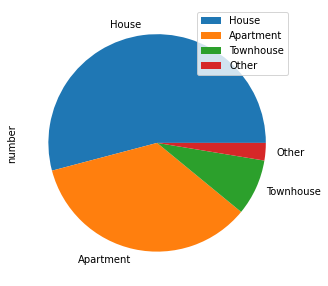

In [161]:
# visualization of percentage of property type
df = pd.DataFrame({'number': [895, 578, 138,43]},
                  index=['House', 'Apartment' , 'Townhouse','Other'])
plot = df.plot.pie(y='number', figsize=(5, 5))

In [162]:
population = pd.read_csv('../data/curated/population_final_predict.csv')

In [163]:
population = population.drop(['Unnamed: 0','SA2 code','2026 Population','2031 Population','2036 Population'],axis=1)

In [164]:
top10_pop = population[population['SA2 name'].isin(top10_region)].set_index('SA2 name').T

In [165]:
top10_pop['year'] = [2017,2018,2019,2020,2021,2022,2023,2024,2025]

In [166]:
top10_pop.to_csv('../data/curated/top10_population.csv')

In [167]:
# Finding the feature in last 10 growth rate
last_10 = pd.read_csv('../data/curated/last_10.csv')

In [168]:
last_10_region = list(last_10.columns)

In [169]:
last_10_region.remove('Unnamed: 0')

In [170]:
last10_pop = population[population['SA2 name'].isin(last_10_region)].set_index('SA2 name').T

In [171]:
last10_pop['year'] = [2017,2018,2019,2020,2021,2022,2023,2024,2025]

In [172]:
last10_pop.to_csv('../data/curated/last10_population.csv')

# As we know Wheelers Hill are the top 1 growth rate amoung all region, so we aims to finds some inspire from the data in this region

In [173]:
wh = merge_data[merge_data.closest_sa2 == 'Wheelers Hill']

In [174]:
wh.bed.value_counts()

4.0    51
3.0    42
5.0    14
2.0     4
Name: bed, dtype: int64

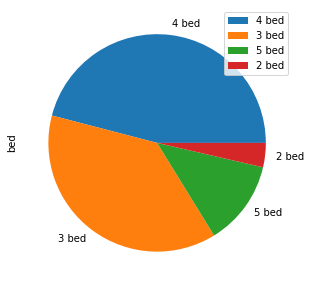

In [175]:
# visualization of percentage of property type
df_wh = pd.DataFrame({'bed': [51, 42, 14,4]},
                  index=['4 bed', '3 bed' , '5 bed','2 bed'])
plot = df_wh.plot.pie(y='bed', figsize=(5, 5))

In [176]:
fature_in_wh = wh.groupby('years').mean('bed').reset_index()

In [177]:
fature_in_wh.to_csv('../data/curated/featureInWh.csv')

In [178]:
fature_in_wh

,years,postcode,bed,bath,car,Income,Population,Hospital num
0,2017,3150,2.857143,1.428571,1.714286,67458.466667,20970.000000,2.0
1,2018,3150,4.500000,2.500000,1.500000,68887.866667,21033.000000,2.0
2,2019,3150,3.666667,2.000000,1.833333,70317.266667,21116.000000,2.0
3,2020,3150,3.428571,1.714286,1.642857,71746.666667,21164.000000,2.0
4,2021,3150,2.833333,1.500000,1.500000,73176.066667,20854.000000,2.0
5,2022,3150,3.842105,2.157895,2.000000,74605.466667,21396.226119,2.0
6,2023,3150,3.842105,2.157895,2.000000,76034.866667,21515.074396,2.0
7,2024,3150,3.842105,2.157895,2.000000,77464.266667,21633.922674,2.0
8,2025,3150,3.842105,2.157895,2.000000,78893.666667,21752.770952,2.0
